<a href="https://colab.research.google.com/github/NikhithaVarma/Guvi-Task7/blob/main/Assignment_13(KNN_on_social_networks_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the libraries

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve

Importing the dataset

In [96]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [97]:
df.shape

(400, 5)

In [98]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [99]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [100]:
#userid is not required here so drop that column
df.drop("User ID",inplace=True,axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [101]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [102]:
df=df.drop_duplicates()
df.shape

(380, 4)

In [103]:
#gender also has no impact for the prediction of purchasing a car, so drop the column
df.drop("Gender", axis=1, inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Splitting the dataset into the Training set and Test set

In [134]:
X = df[['Age', 'EstimatedSalary']].values # fts
y = df['Purchased'].values # target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2) # train- test split
X_train.shape

(304, 2)

In [135]:
y_test

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Feature Scaling

In [136]:
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test = scaler.transform(X_test) # transform the test data 

Fitting K-NN to the Training set

In [137]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " cv score : ", np.mean(cross_val_score(knn, X_train, y_train, cv=10))) #predicting using the model


K value  :  1  train score :  0.9967105263157895  cv score :  0.8288172043010753
K value  :  2  train score :  0.9177631578947368  cv score :  0.8255913978494623
K value  :  3  train score :  0.9210526315789473  cv score :  0.9010752688172043
K value  :  4  train score :  0.9210526315789473  cv score :  0.868494623655914
K value  :  5  train score :  0.9144736842105263  cv score :  0.8881720430107528
K value  :  6  train score :  0.9046052631578947  cv score :  0.8881720430107528
K value  :  7  train score :  0.9111842105263158  cv score :  0.9013978494623658
K value  :  8  train score :  0.9177631578947368  cv score :  0.9015053763440861
K value  :  9  train score :  0.9144736842105263  cv score :  0.9112903225806452
K value  :  10  train score :  0.9243421052631579  cv score :  0.8916129032258064
K value  :  20  train score :  0.9111842105263158  cv score :  0.898279569892473
K value  :  50  train score :  0.8947368421052632  cv score :  0.8783870967741937


K=3 is the best value of k...so we fit the knn classifier with k=3

In [138]:
knn = KNeighborsClassifier(3) #initialising the model
knn.fit(X_train,y_train) # training the model


KNeighborsClassifier(n_neighbors=3)

Predicting the Test set results

In [139]:
y_pred=knn.predict(X_test)
y_pred


array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

Making the Confusion Matrix

In [140]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[49,  2],
       [ 4, 21]])

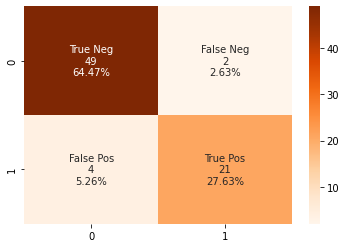

In [141]:
import seaborn as sns
group_names = ["True Neg","False Neg","False Pos","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Oranges')

In [142]:
#Evaluating The Predection
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Roc_Auc-score :",roc_auc_score(y_test,y_pred))


Accuracy : 0.9210526315789473
Roc_Auc-score : 0.9003921568627451


The auroc score is 0.90 which is better score implies it is a good model